# Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from kneed import KneeLocator

### Lectura del dataset preprocesado

In [2]:
FILE_PATH = "../Data/numerical.csv"

In [3]:
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)

In [4]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
3,Acer,Iconia Tab 10 A3-A40,Android,2.000,230.0,False,Li-Ion,NaN,4,1.30,5.0,2.0,64.0
4,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
2068,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
2069,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
2070,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


### Eliminación valores NULL

In [5]:
df = df.dropna()
# Reset a los valores del index en el dataframe #
df = df.reset_index(drop=True)

In [6]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
3,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
4,Acer,Liquid Zest Plus,Android,2.000,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
1877,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
1878,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
1879,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


### Conversión de columnas a valores numéricos

In [7]:
columns = ['brand', 'OS', 'battery_removable', 'battery_type']
encoder = preprocessing.LabelEncoder()
df_encoded = df[columns].apply(encoder.fit_transform)
df_encoded

,brand,OS,battery_removable,battery_type
0,0,0,0,0
1,0,0,1,1
2,0,0,1,0
3,0,0,1,1
4,0,0,0,0
...,...,...,...,...
1876,56,0,1,0
1877,56,0,1,0
1878,56,0,0,0
1879,56,0,0,0


In [8]:
df = df.drop(columns, axis=1)
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0
3,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0
4,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...
1876,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0
1877,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0
1878,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0
1879,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0


In [9]:
df = df.join(df_encoded)
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,0,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,0,1,1
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,0,1,0
3,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,0,1,1
4,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,56,0,1,0
1877,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,56,0,1,0
1878,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,56,0,0,0
1879,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,56,0,0,0


In [10]:
df.drop(df[df['internal_memory_gb'] == '16GB'].index, inplace = True)

/home/german/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


### Obtención de características

In [11]:
features = ['approx_price_EUR', 'battery_mah', 'CPU_cores', 'battery_mah', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp']

In [12]:
x = df[features]

### Clustering

In [13]:
kmeans = KMeans()

In [14]:
kmeans.fit(x)

KMeans()

In [15]:
kmeans.inertia_

375223997.3952077

In [16]:
kmeans.cluster_centers_

array([[2.01661765e+02, 2.23761029e+03, 4.21764706e+00, 2.23761029e+03,
        1.38589706e+00, 1.42102941e+01, 2.98014706e+01, 8.97058824e-02,
        5.73529412e-01, 2.73529412e-01, 9.01117647e+00],
       [3.02465753e+02, 6.59630137e+03, 3.72602740e+00, 6.59630137e+03,
        1.45109589e+00, 4.30136986e+01, 3.00136986e+01, 2.46575342e-01,
        0.00000000e+00, 6.57534247e-01, 5.45342466e+00],
       [3.00262530e+02, 3.08090692e+03, 5.68496420e+00, 3.08090692e+03,
        1.69224344e+00, 3.38257757e+01, 3.01646778e+01, 8.59188544e-02,
        2.67303103e-01, 2.76849642e-01, 1.23726730e+01],
       [3.78571429e+02, 9.35239286e+03, 4.28571429e+00, 9.35239286e+03,
        1.66178571e+00, 5.57142857e+01, 2.58214286e+01, 7.14285714e-01,
        0.00000000e+00, 4.64285714e-01, 6.67857143e+00],
       [2.70000000e+04, 4.00000000e+03, 8.00000000e+00, 4.00000000e+03,
        1.30000000e+00, 3.20000000e+01, 1.60000000e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.30000000e+

In [17]:
kmeans.n_iter_

10

In [18]:
kmeans.labels_[:3]

array([2, 5, 0], dtype=int32)

In [19]:
y =  kmeans.labels_
target_names = []
for label in y:
    if label not in target_names:
        target_names.append(label)

### Visualización

In [20]:
# Función para visualización de clusters #
def plot_clusters(data, clustering_model, dim_reduction, title=None):
    if dim_reduction == True:
        pca = PCA(n_components=2)
        x = pca.fit(data).transform(data)
    
    y = clustering_model.labels_
    target_names = []
    for label in y:
        if label not in target_names:
            target_names.append(label)
    plt.figure(figsize=(20, 10))
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'yellow', 'magenta']

    for color, i, target_name in zip(colors, target_names, target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw, label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

In [21]:
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

In [22]:
X_r

array([[  930.87392638,  -116.03158478],
       [ 1894.63332889,   -67.62697222],
       [-1049.69816028,  -101.15391282],
       ...,
       [ 1780.81129714,   -83.97243376],
       [  933.34401997,   -36.19803682],
       [-1894.83593418,    16.62714329]])

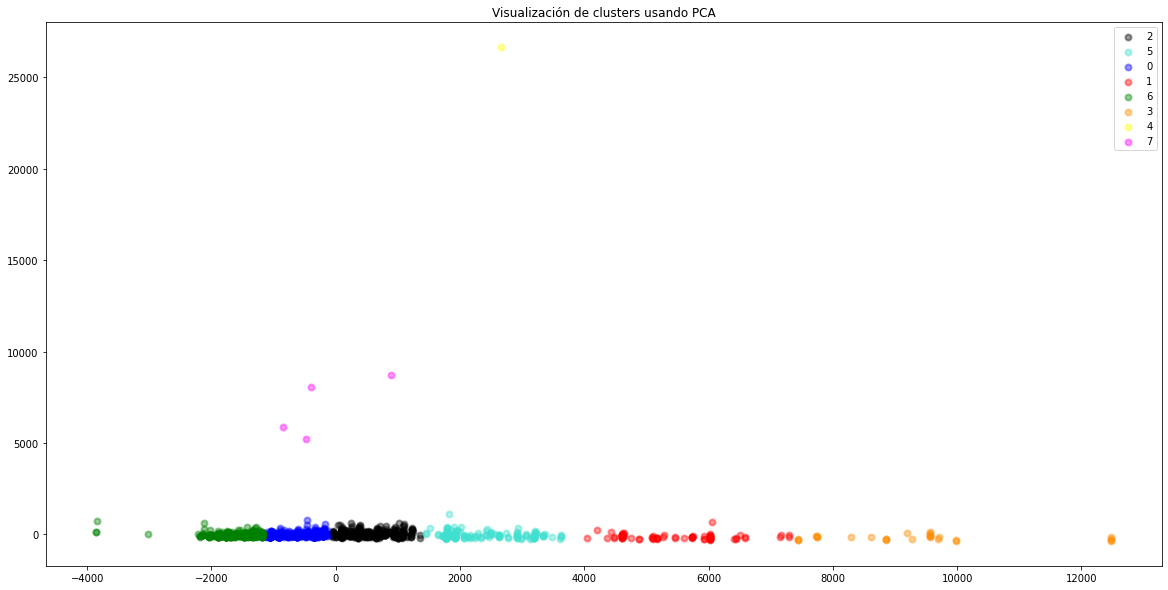

In [23]:
plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'yellow', 'magenta']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Visualización de clusters usando PCA')
plt.show()


### Selección del número de clusters usando el método del codo

In [24]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

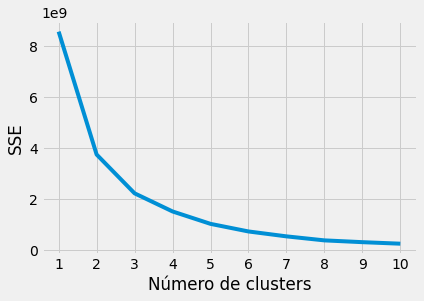

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

#### Verificando valor de k utilizando la biblioteca kneed

In [26]:
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')

In [27]:
kl.elbow

3

### K = 3
Con base al método del codo, el número optimo de clusters es 3

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [29]:
kmeans.inertia_

2221900784.217885

In [30]:
y =  kmeans.labels_
target_names = []
for label in y:
    if label not in target_names:
        target_names.append(label)

In [31]:
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

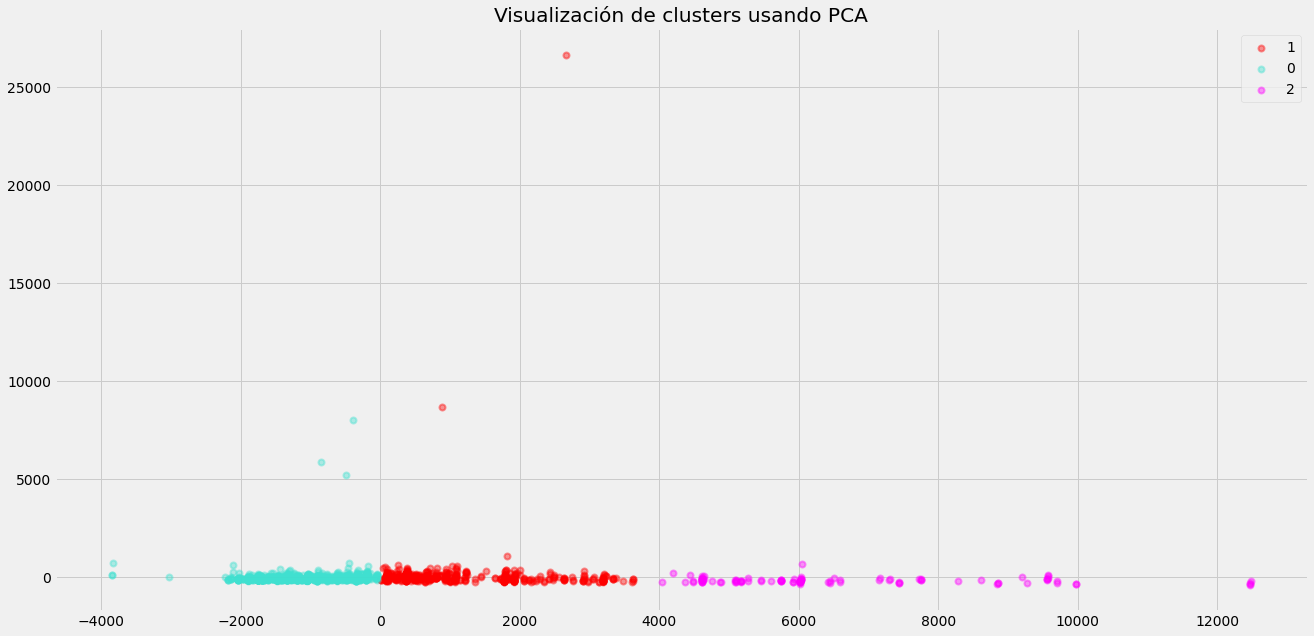

In [32]:
plt.figure(figsize=(20, 10))
lw = 2
colors = ['red', 'turquoise', 'magenta']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Visualización de clusters usando PCA')
plt.show()

### Determinar número de clusters mediante el método silhouette coefficient

In [33]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

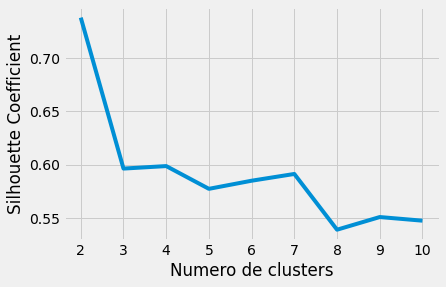

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [36]:
kmeans_silhouette = silhouette_score(x, kmeans.labels_).round(2)
kmeans_silhouette

0.6

## Clustering utilizando normalización

### StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_scaled = scaler.fit_transform(x)

#### Método del codo

In [40]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

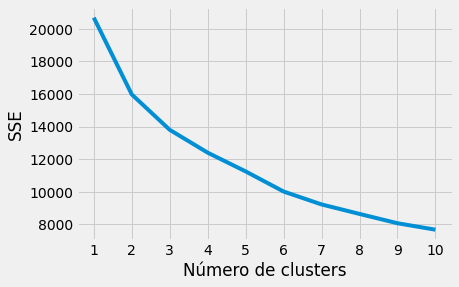

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
kl.elbow

3

In [43]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

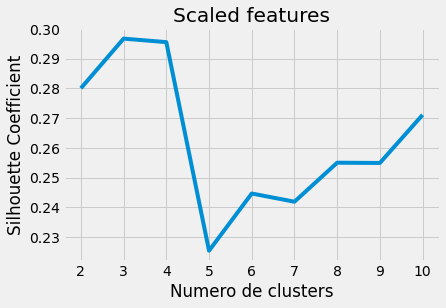

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Scaled features")
plt.xlabel("Numero de clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [46]:
kmeans_silhouette = silhouette_score(x_scaled, kmeans.labels_).round(2)
kmeans_silhouette

0.3

#### Visualización

In [47]:
y =  kmeans.labels_
target_names = []
for label in y:
    if label not in target_names:
        target_names.append(label)

In [48]:
pca = PCA(n_components=2)
X_r = pca.fit(x_scaled).transform(x_scaled)

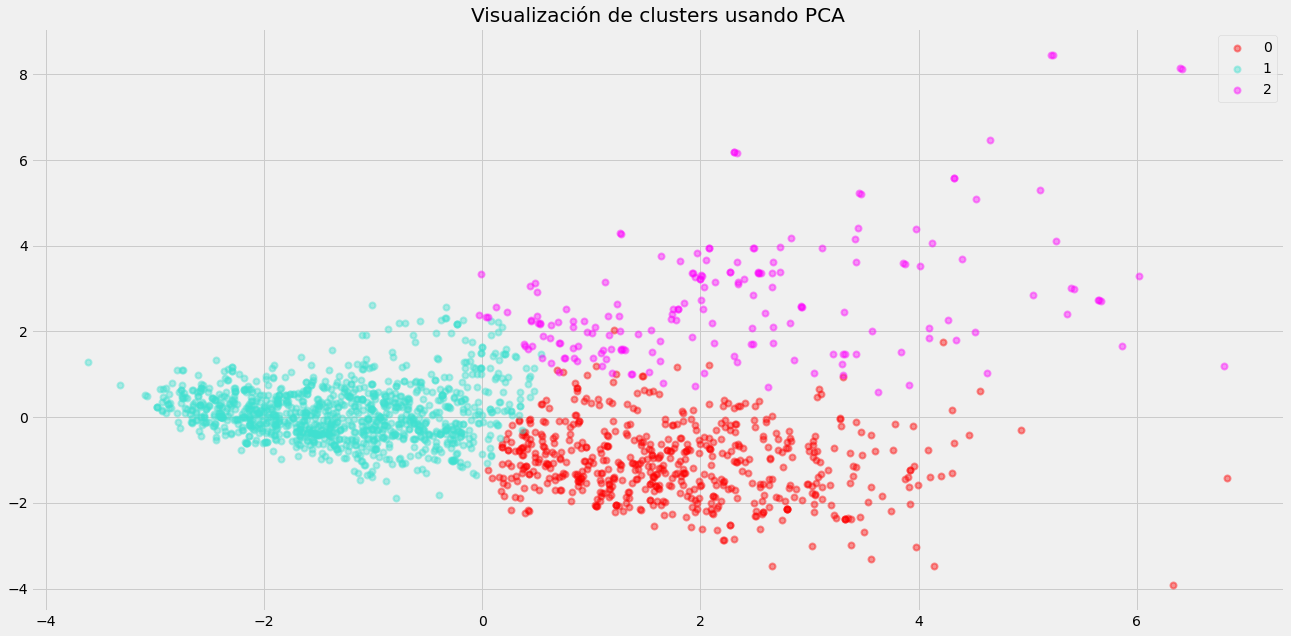

In [49]:
plt.figure(figsize=(20, 10))
lw = 2
colors = ['red', 'turquoise', 'magenta']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Visualización de clusters usando PCA')
plt.show()

### MinMax Scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
minmaxScaler = MinMaxScaler()

In [52]:
x_minmaxscaled = minmaxScaler.fit_transform(x)

In [53]:
x_minmaxscaled

array([[0.00519095, 0.29350649, 0.33333333, ..., 0.        , 0.        ,
        0.52991453],
       [0.00815721, 0.35238095, 0.77777778, ..., 1.        , 0.5       ,
        0.52991453],
       [0.00333704, 0.17229437, 0.33333333, ..., 1.        , 0.        ,
        0.31623932],
       ...,
       [0.00741565, 0.34545455, 0.11111111, ..., 0.        , 0.        ,
        0.18803419],
       [0.00815721, 0.29350649, 0.        , ..., 0.        , 0.        ,
        0.11111111],
       [0.00667408, 0.12034632, 0.        , ..., 1.        , 0.        ,
        0.18803419]])

#### Método del codo

In [54]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_minmaxscaled)
    sse.append(kmeans.inertia_)

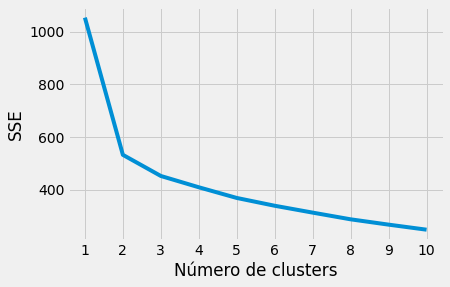

In [55]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [56]:
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
kl.elbow

2

In [57]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_minmaxscaled)
    score = silhouette_score(x_minmaxscaled, kmeans.labels_)
    silhouette_coefficients.append(score)

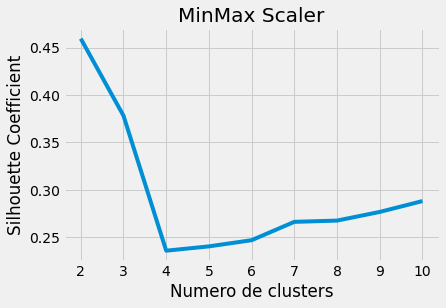

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("MinMax Scaler")
plt.xlabel("Numero de clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(x_minmaxscaled)

KMeans(n_clusters=2, random_state=42)

In [60]:
kmeans_silhouette = silhouette_score(x_minmaxscaled, kmeans.labels_).round(3)
kmeans_silhouette

0.46

In [61]:
y =  kmeans.labels_
target_names = []
for label in y:
    if label not in target_names:
        target_names.append(label)

In [62]:
pca = PCA(n_components=2)
X_r = pca.fit(x_minmaxscaled).transform(x_minmaxscaled)

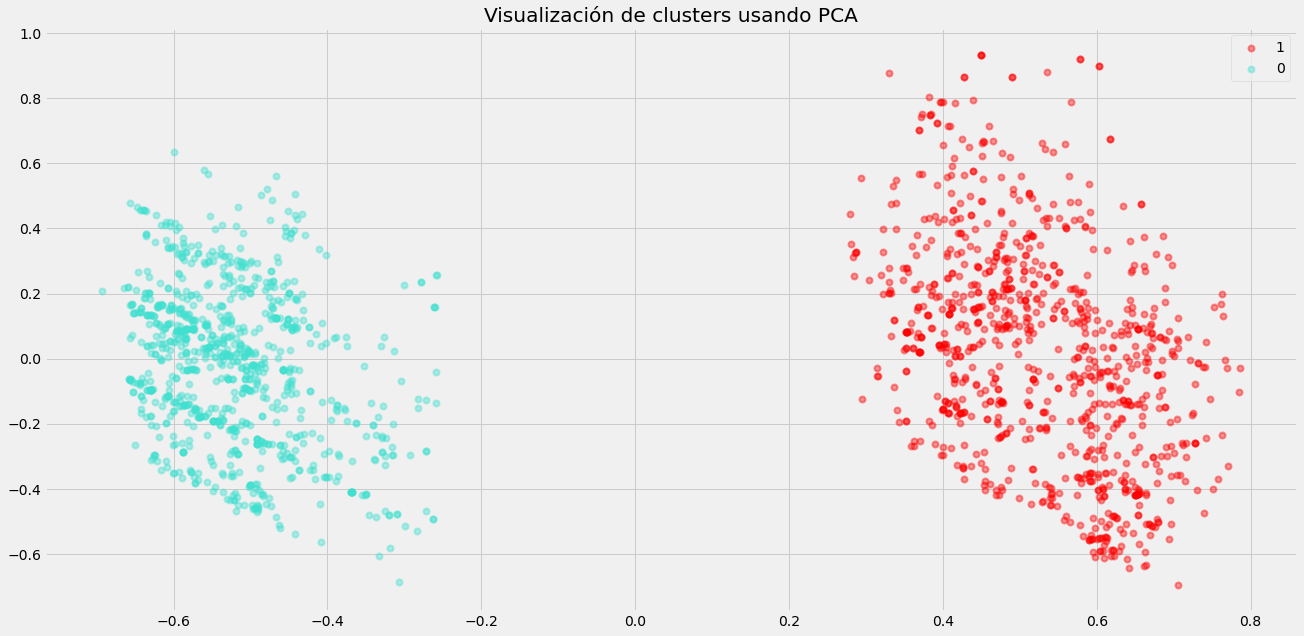

In [63]:
plt.figure(figsize=(20, 10))
lw = 2
colors = ['red', 'turquoise', 'magenta']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Visualización de clusters usando PCA')
plt.show()